In [1]:
import os
import warnings

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import torch

warnings.filterwarnings("ignore")

from trans_oil_gas import utils_fix_seeds, utils_cv

Set parameters for plots.

In [2]:
plt.rc('font', size=22)          # controls default text sizes
plt.rc('axes', titlesize=22)     # fontsize of the axes title
plt.rc('axes', labelsize=30)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=30)    # fontsize of the tick labels
plt.rc('ytick', labelsize=30)    # fontsize of the tick labels
plt.rc('legend', fontsize=30)    # legend fontsize
plt.rc('figure', titlesize=22)   # fontsize of the figure title

Choose GPU device if it is available.

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
gpu = [0] if 'cuda' in device.type else 0
device, gpu

(device(type='cuda'), [0])

Fix all possible seeds for results reproducibility.

In [4]:
utils_fix_seeds.fix_seeds(device=device)

# Read data

Reading of already preprocessed data (here synthetic dataset with the same columns as in the original one is presented).

In [5]:
df = pd.read_csv('../data/synthetic_well_log_data.csv')
df

,DRHO,DENS,GR,DTC,WELLNAME
0,0.01778,2.3794,1.214982,101.5516,26
1,0.01701,2.3705,1.086457,101.6722,26
2,0.01624,2.3615,0.957933,101.7928,26
3,0.01779,2.3593,0.493992,101.1051,26
4,0.02008,2.3591,-0.076734,100.1601,26
...,...,...,...,...,...
730,0.11269,2.6161,0.742381,92.0410,127
731,0.11269,2.6161,0.775581,92.1752,127
732,0.11269,2.6161,0.686798,91.6055,127
733,0.11269,2.6161,0.614402,91.7522,127


# HPO and initial params

Set parameters for hyperparameter optimization and best model training.

In [6]:
n_trials = 2 
n_splits_res = 2 
n_splits_hpo = 2 
epochs = 2

slice_len = 100
well_column = "WELLNAME"
save_dir = "./saves/"
log_dir = "./logs/"

results_len_train = 500 
results_len_test = 70

Create necessary directories if they have not existed yet.

In [7]:
if not os.path.exists(save_dir):
    os.mkdir(save_dir)

In [8]:
if not os.path.exists(log_dir):
    os.mkdir(log_dir)

Group all necessary parameters into a dictionary.

In [9]:
data_kwargs = {
    "df": df,
    "n_splits_hpo": n_splits_hpo,
    "n_splits_res": n_splits_res,
    "epochs": epochs,
    "slice_len": slice_len,
    "results_len_train": results_len_train,
    "results_len_test": results_len_test,
    "well_column": well_column,
    "save_dir": save_dir,
    "log_dir": log_dir,
}

# Models' training

## Transformer

First, we set fixed hyperparameters and hyperparameters' search space of model.

In [10]:
fixed_params_tr = {
    "d_model": 4,
}

default_params_tr = {} 

specific_params_tr = {
    "nhead": ("cat", [1, 2, 4]),
    "dim_feedforward": ("int", [256, 2048, 256]),
    "dropout": ("float", [0.1, 0.5]),
    "num_layers": ("int", [1, 6]),
    "hidden_size": ("int", [32, 128, 32]),
}

Siamese architecture.

In [11]:
siamese_tr, res_siamese_tr, roc_auc_all_trials_siamese_tr = utils_cv.optuna_hpo_and_best_model_evaluation(
    model_type='siamese_transformer',
    device=device,
    gpu=gpu,
    n_trials=n_trials,
    fixed_params=fixed_params_tr,
    default_params=default_params_tr,
    specific_params=specific_params_tr,
    data_kwargs=data_kwargs
)

[I 2022-12-03 18:58:19,882] A new study created in memory with name: no-name-2dc461d9-1add-468c-a966-b44dcef20b41


model_type: siamese_transformer


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name          | Type                | Params
------------------------------------------------------
0 | model         | SiameseArchitecture | 193 K 
1 | loss_function | BCELoss             | 0     
------------------------------------------------------
193 K     Trainable params
0         Non-trainable params
193 K     Total params
0.774     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Accuracy:0.557, ROC_AUC:0.562, PR_AUC:0.551


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name          | Type                | Params
------------------------------------------------------
0 | model         | SiameseArchitecture | 193 K 
1 | loss_function | BCELoss             | 0     
------------------------------------------------------
193 K     Trainable params
0         Non-trainable params
193 K     Total params
0.774     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

[I 2022-12-03 18:58:46,788] Trial 0 finished with value: 0.5618367346938775 and parameters: {'nhead': 1, 'dim_feedforward': 2048, 'dropout': 0.48276561038285704, 'num_layers': 5, 'hidden_size': 128}. Best is trial 0 with value: 0.5618367346938775.
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name          | Type                | Params
------------------------------------------------------
0 | model         | SiameseArchitecture | 112 K 
1 | loss_function | BCELoss             | 0     
------------------------------------------------------
112 K     Trainable params
0         Non-trainable params
112 K     Total params
0.449     Total estimated model params size (MB)


Accuracy:0.571, ROC_AUC:0.561, PR_AUC:0.597


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name          | Type                | Params
------------------------------------------------------
0 | model         | SiameseArchitecture | 112 K 
1 | loss_function | BCELoss             | 0     
------------------------------------------------------
112 K     Trainable params
0         Non-trainable params
112 K     Total params
0.449     Total estimated model params size (MB)


Accuracy:0.436, ROC_AUC:0.488, PR_AUC:0.51


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

[I 2022-12-03 18:59:06,236] Trial 1 finished with value: 0.5362244897959183 and parameters: {'nhead': 4, 'dim_feedforward': 2048, 'dropout': 0.4726763954286718, 'num_layers': 4, 'hidden_size': 64}. Best is trial 0 with value: 0.5618367346938775.


Accuracy:0.529, ROC_AUC:0.584, PR_AUC:0.56
best_params: {'nhead': 1, 'dim_feedforward': 2048, 'dropout': 0.48276561038285704, 'num_layers': 5, 'hidden_size': 128}


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name          | Type                | Params
------------------------------------------------------
0 | model         | SiameseArchitecture | 193 K 
1 | loss_function | BCELoss             | 0     
------------------------------------------------------
193 K     Trainable params
0         Non-trainable params
193 K     Total params
0.774     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name          | Type                | Params
------------------------------------------------------
0 | model         | SiameseArchitecture | 193 K 
1 | loss_function | BCELoss             | 0     
------------------------------------------------------
193 K     Trainable params
0         Non-trainable params
193 K     Total params
0.774     Total estimated model params size (MB)


Accuracy:0.486, ROC_AUC:0.522, PR_AUC:0.545
TN: 11, FP: 24, FN: 12, TP: 23
precision = tp / (tp + fp); recall = tp / (tp + fn)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Accuracy:0.443, ROC_AUC:0.398, PR_AUC:0.453
TN: 18, FP: 17, FN: 22, TP: 13
precision = tp / (tp + fp); recall = tp / (tp + fn)
Accuracy: 0.464 ± 0.021
Precision: 0.461 ± 0.028
Recall: 0.514 ± 0.143
ROC AUC: 0.460 ± 0.062
PR AUC: 0.499 ± 0.046
--------------------------------------------------
Eucl_Accuracy: 0.519 ± 0.018
Eucl_Precision: nan ± nan
Eucl_Recall: 0.000 ± 0.000
Eucl_ROC AUC: 0.500 ± 0.000
Eucl_PR AUC: 0.476 ± 0.057
--------------------------------------------------
Cos_Accuracy: 0.538 ± 0.025
Cos_Precision: 0.500 ± 0.000
Cos_Recall: 1.000 ± 0.000
Cos_ROC AUC: 0.500 ± 0.000
Cos_PR AUC: 0.524 ± 0.047
--------------------------------------------------

all_results: ({'Accuracy': [0.4857142857142857, 0.44285714285714284], 'Precision': [0.48936170212765956, 0.43333333333333335], 'Recall': [0.6571428571428571, 0.37142857142857144], 'ROC AUC': [0.5224489795918368, 0.39836734693877557], 'PR AUC': [0.5449193259353647, 0.45277934729966696]}, {'Eucl_Accuracy': [0.5012351427481119, 0.5

To analyse training process, one can use `tensorboard` extension for jupyter notebook. To use it, please, uncomment the cell below:

In [12]:
# %load_ext tensorboard
# %tensorboard --logdir ./logs --host 0.0.0.0

Triplet architecture.

In [13]:
triplet_tr, res_triplet_tr, roc_auc_all_trials_triplet_tr = utils_cv.optuna_hpo_and_best_model_evaluation(
    model_type='triplet_transformer',
    device=device,
    gpu=gpu,
    n_trials=n_trials,
    fixed_params=fixed_params_tr,
    default_params=default_params_tr,
    specific_params=specific_params_tr,
    data_kwargs=data_kwargs
)

[I 2022-12-03 18:59:29,446] A new study created in memory with name: no-name-8aa0260e-2984-4d96-b749-4162d4330c11
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name          | Type                | Params
------------------------------------------------------
0 | model         | TripletArchitecture | 86.2 K
1 | loss_function | TripletMarginLoss   | 0     
------------------------------------------------------
86.2 K    Trainable params
0         Non-trainable params
86.2 K    Total params
0.345     Total estimated model params size (MB)


model_type: triplet_transformer


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name          | Type                | Params
------------------------------------------------------
0 | model         | TripletArchitecture | 86.2 K
1 | loss_function | TripletMarginLoss   | 0     
------------------------------------------------------
86.2 K    Trainable params
0         Non-trainable params
86.2 K    Total params
0.345     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

[I 2022-12-03 18:59:42,779] Trial 0 finished with value: 0.8214285714285714 and parameters: {'nhead': 1, 'dim_feedforward': 1280, 'dropout': 0.25339714884646625, 'num_layers': 3, 'hidden_size': 128}. Best is trial 0 with value: 0.8214285714285714.
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name          | Type                | Params
------------------------------------------------------
0 | model         | TripletArchitecture | 80.6 K
1 | loss_function | TripletMarginLoss   | 0     
------------------------------------------------------
80.6 K    Trainable params
0         Non-trainable params
80.6 K    Total params
0.322     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name          | Type                | Params
------------------------------------------------------
0 | model         | TripletArchitecture | 80.6 K
1 | loss_function | TripletMarginLoss   | 0     
------------------------------------------------------
80.6 K    Trainable params
0         Non-trainable params
80.6 K    Total params
0.322     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

[I 2022-12-03 18:59:58,032] Trial 1 finished with value: 0.7428571428571429 and parameters: {'nhead': 1, 'dim_feedforward': 768, 'dropout': 0.4818682931362036, 'num_layers': 6, 'hidden_size': 96}. Best is trial 0 with value: 0.8214285714285714.
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name          | Type                | Params
------------------------------------------------------
0 | model         | TripletArchitecture | 86.2 K
1 | loss_function | TripletMarginLoss   | 0     
------------------------------------------------------
86.2 K    Trainable params
0         Non-trainable params
86.2 K    Total params
0.345     Total estimated model params size (MB)


best_params: {'nhead': 1, 'dim_feedforward': 1280, 'dropout': 0.25339714884646625, 'num_layers': 3, 'hidden_size': 128}


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name          | Type                | Params
------------------------------------------------------
0 | model         | TripletArchitecture | 86.2 K
1 | loss_function | TripletMarginLoss   | 0     
------------------------------------------------------
86.2 K    Trainable params
0         Non-trainable params
86.2 K    Total params
0.345     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Accuracy: nan ± nan
Precision: nan ± nan
Recall: nan ± nan
ROC AUC: nan ± nan
PR AUC: nan ± nan
--------------------------------------------------
Eucl_Accuracy: 1.000 ± 0.000
Eucl_Precision: nan ± nan
Eucl_Recall: 0.000 ± 0.000
Eucl_ROC AUC: 0.500 ± 0.000
Eucl_PR AUC: 1.000 ± 0.000
--------------------------------------------------
Cos_Accuracy: 1.000 ± 0.000
Cos_Precision: 1.000 ± 0.000
Cos_Recall: 0.700 ± 0.071
Cos_ROC AUC: 0.850 ± 0.036
Cos_PR AUC: 1.000 ± 0.000
--------------------------------------------------

all_results: ({'Accuracy': [], 'Precision': [], 'Recall': [], 'ROC AUC': [], 'PR AUC': []}, {'Eucl_Accuracy': [1.0, 1.0], 'Eucl_Precision': [nan, nan], 'Eucl_Recall': [0.0, 0.0], 'Eucl_ROC AUC': [0.5, 0.5], 'Eucl_PR AUC': [1.0, 1.0]}, {'Cos_Accuracy': [1.0, 1.0], 'Cos_Precision': [1.0, 1.0], 'Cos_Recall': [0.7714285714285715, 0.6285714285714286], 'Cos_ROC AUC': [0.8857142857142857, 0.8142857142857143], 'Cos_PR AUC': [1.0, 1.0]})
********************************************

## Informer

The same as for Transformer.

In [14]:
fixed_params_inf = {
    "enc_in": 4,
    "distil": None,
    "device": device,
    "attn": "prob",
    "activation": "gelu",
    "output_attention": False,
    "n_seq": 100
}

default_params_inf = {
    "d_model": 64,
} 

specific_params_inf = {
    "d_model": ("cat", [16, 32, 64]),
    "factor": ("int", [3, 11, 2]),
    "n_heads": ("cat", [2, 4, 6, 8]),
    "dropout": ("float", [0.1, 0.5]),
    "d_ff" : ("cat", [128, 512, 1024]),
    "e_layers": ("int", [2, 6, 1]),
}

In [15]:
siamese_inf, res_siamese_inf, roc_auc_all_trials_siamese_inf = utils_cv.optuna_hpo_and_best_model_evaluation(
    model_type='siamese_informer',
    device=device,
    gpu=gpu,
    n_trials=n_trials,
    fixed_params=fixed_params_inf,
    default_params=default_params_inf,
    specific_params=specific_params_inf,
    data_kwargs=data_kwargs
)

[I 2022-12-03 19:00:13,898] A new study created in memory with name: no-name-c6b0d8b7-7999-48aa-b4c8-8cac8e336f99


model_type: siamese_informer


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name          | Type                | Params
------------------------------------------------------
0 | model         | SiameseArchitecture | 490 K 
1 | loss_function | BCELoss             | 0     
------------------------------------------------------
490 K     Trainable params
0         Non-trainable params
490 K     Total params
1.960     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name          | Type                | Params
------------------------------------------------------
0 | model         | SiameseArchitecture | 490 K 
1 | loss_function | BCELoss             | 0     
------------------------------------------------------
490 K     Trainable params
0         Non-trainable params
490 K     Total params
1.960     Total estimated model params size (MB)


Accuracy:1.0, ROC_AUC:1.0, PR_AUC:1.0


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

[I 2022-12-03 19:00:35,386] Trial 0 finished with value: 1.0 and parameters: {'d_model': 64, 'factor': 3, 'n_heads': 4, 'dropout': 0.22941928520960575, 'd_ff': 128, 'e_layers': 2}. Best is trial 0 with value: 1.0.


Accuracy:1.0, ROC_AUC:1.0, PR_AUC:1.0


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name          | Type                | Params
------------------------------------------------------
0 | model         | SiameseArchitecture | 590 K 
1 | loss_function | BCELoss             | 0     
------------------------------------------------------
590 K     Trainable params
0         Non-trainable params
590 K     Total params
2.362     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name          | Type                | Params
------------------------------------------------------
0 | model         | SiameseArchitecture | 590 K 
1 | loss_function | BCELoss             | 0     
------------------------------------------------------
590 K     Trainable params
0         Non-trainable params
590 K     Total params
2.362     Total estimated model params size (MB)


Accuracy:1.0, ROC_AUC:1.0, PR_AUC:1.0


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

[I 2022-12-03 19:01:10,713] Trial 1 finished with value: 1.0 and parameters: {'d_model': 64, 'factor': 5, 'n_heads': 2, 'dropout': 0.15556790744842597, 'd_ff': 128, 'e_layers': 5}. Best is trial 0 with value: 1.0.
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name          | Type                | Params
------------------------------------------------------
0 | model         | SiameseArchitecture | 490 K 
1 | loss_function | BCELoss             | 0     
------------------------------------------------------
490 K     Trainable params
0         Non-trainable params
490 K     Total params
1.960     Total estimated model params size (MB)


Accuracy:1.0, ROC_AUC:1.0, PR_AUC:1.0
best_params: {'d_model': 64, 'factor': 3, 'n_heads': 4, 'dropout': 0.22941928520960575, 'd_ff': 128, 'e_layers': 2}


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Accuracy:1.0, ROC_AUC:1.0, PR_AUC:1.0
TN: 35, FP: 0, FN: 0, TP: 35
precision = tp / (tp + fp); recall = tp / (tp + fn)


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name          | Type                | Params
------------------------------------------------------
0 | model         | SiameseArchitecture | 490 K 
1 | loss_function | BCELoss             | 0     
------------------------------------------------------
490 K     Trainable params
0         Non-trainable params
490 K     Total params
1.960     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Accuracy:1.0, ROC_AUC:1.0, PR_AUC:1.0
TN: 35, FP: 0, FN: 0, TP: 35
precision = tp / (tp + fp); recall = tp / (tp + fn)
Accuracy: 1.000 ± 0.000
Precision: 1.000 ± 0.000
Recall: 1.000 ± 0.000
ROC AUC: 1.000 ± 0.000
PR AUC: 1.000 ± 0.000
--------------------------------------------------
Eucl_Accuracy: 1.000 ± 0.000
Eucl_Precision: nan ± nan
Eucl_Recall: 0.000 ± 0.000
Eucl_ROC AUC: 0.500 ± 0.000
Eucl_PR AUC: 1.000 ± 0.000
--------------------------------------------------
Cos_Accuracy: 1.000 ± 0.000
Cos_Precision: 1.000 ± 0.000
Cos_Recall: 1.000 ± 0.000
Cos_ROC AUC: 1.000 ± 0.000
Cos_PR AUC: 1.000 ± 0.000
--------------------------------------------------

all_results: ({'Accuracy': [1.0, 1.0], 'Precision': [1.0, 1.0], 'Recall': [1.0, 1.0], 'ROC AUC': [1.0, 1.0], 'PR AUC': [1.0, 1.0]}, {'Eucl_Accuracy': [1.0, 1.0], 'Eucl_Precision': [nan, nan], 'Eucl_Recall': [0.0, 0.0], 'Eucl_ROC AUC': [0.5, 0.5], 'Eucl_PR AUC': [1.0, 1.0]}, {'Cos_Accuracy': [1.0, 1.0], 'Cos_Precision': [1.0, 1.0], 'Cos_

In [16]:
triplet_inf, res_triplet_inf, roc_auc_all_trials_triplet_inf = utils_cv.optuna_hpo_and_best_model_evaluation(
    model_type='triplet_informer',
    device=device,
    gpu=gpu,
    n_trials=n_trials,
    fixed_params=fixed_params_inf,
    default_params=default_params_inf,
    specific_params=specific_params_inf,
    data_kwargs=data_kwargs
)

[I 2022-12-03 19:01:36,875] A new study created in memory with name: no-name-ec712d43-054b-4ba7-94d6-945bb57bc230


model_type: triplet_informer


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name          | Type                | Params
------------------------------------------------------
0 | model         | TripletArchitecture | 1.2 M 
1 | loss_function | TripletMarginLoss   | 0     
------------------------------------------------------
1.2 M     Trainable params
0         Non-trainable params
1.2 M     Total params
4.624     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name          | Type                | Params
------------------------------------------------------
0 | model         | TripletArchitecture | 1.2 M 
1 | loss_function | TripletMarginLoss   | 0     
------------------------------------------------------
1.2 M     Trainable params
0         Non-trainable params
1.2 M     Total params
4.624     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

[I 2022-12-03 19:02:00,435] Trial 0 finished with value: 1.0 and parameters: {'d_model': 64, 'factor': 3, 'n_heads': 4, 'dropout': 0.4264759660819143, 'd_ff': 1024, 'e_layers': 5}. Best is trial 0 with value: 1.0.
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name          | Type                | Params
------------------------------------------------------
0 | model         | TripletArchitecture | 166 K 
1 | loss_function | TripletMarginLoss   | 0     
------------------------------------------------------
166 K     Trainable params
0         Non-trainable params
166 K     Total params
0.666     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name          | Type                | Params
------------------------------------------------------
0 | model         | TripletArchitecture | 166 K 
1 | loss_function | TripletMarginLoss   | 0     
------------------------------------------------------
166 K     Trainable params
0         Non-trainable params
166 K     Total params
0.666     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

[I 2022-12-03 19:02:23,157] Trial 1 finished with value: 1.0 and parameters: {'d_model': 32, 'factor': 9, 'n_heads': 2, 'dropout': 0.16576090766300733, 'd_ff': 128, 'e_layers': 5}. Best is trial 0 with value: 1.0.


best_params: {'d_model': 64, 'factor': 3, 'n_heads': 4, 'dropout': 0.4264759660819143, 'd_ff': 1024, 'e_layers': 5}


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name          | Type                | Params
------------------------------------------------------
0 | model         | TripletArchitecture | 1.2 M 
1 | loss_function | TripletMarginLoss   | 0     
------------------------------------------------------
1.2 M     Trainable params
0         Non-trainable params
1.2 M     Total params
4.624     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name          | Type                | Params
------------------------------------------------------
0 | model         | TripletArchitecture | 1.2 M 
1 | loss_function | TripletMarginLoss   | 0     
------------------------------------------------------
1.2 M     Trainable params
0         Non-trainable params
1.2 M     Total params
4.624     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Accuracy: nan ± nan
Precision: nan ± nan
Recall: nan ± nan
ROC AUC: nan ± nan
PR AUC: nan ± nan
--------------------------------------------------
Eucl_Accuracy: 1.000 ± 0.000
Eucl_Precision: nan ± nan
Eucl_Recall: 0.000 ± 0.000
Eucl_ROC AUC: 0.500 ± 0.000
Eucl_PR AUC: 1.000 ± 0.000
--------------------------------------------------
Cos_Accuracy: 1.000 ± 0.000
Cos_Precision: 1.000 ± 0.000
Cos_Recall: 1.000 ± 0.000
Cos_ROC AUC: 1.000 ± 0.000
Cos_PR AUC: 1.000 ± 0.000
--------------------------------------------------

all_results: ({'Accuracy': [], 'Precision': [], 'Recall': [], 'ROC AUC': [], 'PR AUC': []}, {'Eucl_Accuracy': [1.0, 1.0], 'Eucl_Precision': [nan, nan], 'Eucl_Recall': [0.0, 0.0], 'Eucl_ROC AUC': [0.5, 0.5], 'Eucl_PR AUC': [1.0, 1.0]}, {'Cos_Accuracy': [1.0, 1.0], 'Cos_Precision': [1.0, 1.0], 'Cos_Recall': [1.0, 1.0], 'Cos_ROC AUC': [1.0, 1.0], 'Cos_PR AUC': [1.0, 1.0]})
****************************************************************************************************


## Performer

In [17]:
fixed_params_per = {
    "dim": 4,
    "device": device,
    "use_relu_kernel": False,
    "n_seq": 100
}

default_params_per = {} 

specific_params_per = {
    "head_num": ("cat", [2, 4]),
    "dropout": ("float", [0.1, 0.9]),
    "nb_random_features": ("int", [1, 4])
}

In [18]:
siamese_per, res_siamese_per, roc_auc_all_trials_siamese_per = utils_cv.optuna_hpo_and_best_model_evaluation(
    model_type='siamese_performer',
    device=device,
    gpu=gpu,
    n_trials=n_trials,
    fixed_params=fixed_params_per,
    default_params=default_params_per,
    specific_params=specific_params_per,
    data_kwargs=data_kwargs
)

[I 2022-12-03 19:02:54,819] A new study created in memory with name: no-name-c4bce321-7805-46ba-90f4-9a3dc16d5885
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name          | Type                | Params
------------------------------------------------------
0 | model         | SiameseArchitecture | 2.3 K 
1 | loss_function | BCELoss             | 0     
------------------------------------------------------
2.3 K     Trainable params
0         Non-trainable params
2.3 K     Total params
0.009     Total estimated model params size (MB)


model_type: siamese_performer


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name          | Type                | Params
------------------------------------------------------
0 | model         | SiameseArchitecture | 2.3 K 
1 | loss_function | BCELoss             | 0     
------------------------------------------------------
2.3 K     Trainable params
0         Non-trainable params
2.3 K     Total params
0.009     Total estimated model params size (MB)


Accuracy:0.579, ROC_AUC:0.679, PR_AUC:0.728


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

[I 2022-12-03 19:03:10,423] Trial 0 finished with value: 0.7113265306122449 and parameters: {'head_num': 4, 'dropout': 0.6396441179947354, 'nb_random_features': 3}. Best is trial 0 with value: 0.7113265306122449.


Accuracy:0.571, ROC_AUC:0.744, PR_AUC:0.795


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name          | Type                | Params
------------------------------------------------------
0 | model         | SiameseArchitecture | 2.3 K 
1 | loss_function | BCELoss             | 0     
------------------------------------------------------
2.3 K     Trainable params
0         Non-trainable params
2.3 K     Total params
0.009     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name          | Type                | Params
------------------------------------------------------
0 | model         | SiameseArchitecture | 2.3 K 
1 | loss_function | BCELoss             | 0     
------------------------------------------------------
2.3 K     Trainable params
0         Non-trainable params
2.3 K     Total params
0.009     Total estimated model params size (MB)


Accuracy:0.507, ROC_AUC:0.747, PR_AUC:0.795


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

[I 2022-12-03 19:03:25,763] Trial 1 finished with value: 0.8282653061224489 and parameters: {'head_num': 4, 'dropout': 0.4758865356491505, 'nb_random_features': 3}. Best is trial 1 with value: 0.8282653061224489.
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name          | Type                | Params
------------------------------------------------------
0 | model         | SiameseArchitecture | 2.3 K 
1 | loss_function | BCELoss             | 0     
------------------------------------------------------
2.3 K     Trainable params
0         Non-trainable params
2.3 K     Total params
0.009     Total estimated model params size (MB)


Accuracy:0.543, ROC_AUC:0.909, PR_AUC:0.939
best_params: {'head_num': 4, 'dropout': 0.4758865356491505, 'nb_random_features': 3}


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name          | Type                | Params
------------------------------------------------------
0 | model         | SiameseArchitecture | 2.3 K 
1 | loss_function | BCELoss             | 0     
------------------------------------------------------
2.3 K     Trainable params
0         Non-trainable params
2.3 K     Total params
0.009     Total estimated model params size (MB)


Accuracy:0.571, ROC_AUC:0.564, PR_AUC:0.651
TN: 35, FP: 0, FN: 30, TP: 5
precision = tp / (tp + fp); recall = tp / (tp + fn)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Accuracy:0.6, ROC_AUC:0.776, PR_AUC:0.757
TN: 34, FP: 1, FN: 27, TP: 8
precision = tp / (tp + fp); recall = tp / (tp + fn)
Accuracy: 0.586 ± 0.014
Precision: 0.944 ± 0.056
Recall: 0.186 ± 0.043
ROC AUC: 0.670 ± 0.106
PR AUC: 0.704 ± 0.053
--------------------------------------------------
Eucl_Accuracy: 0.999 ± 0.001
Eucl_Precision: 1.000 ± 0.000
Eucl_Recall: 0.171 ± 0.086
Eucl_ROC AUC: 0.586 ± 0.043
Eucl_PR AUC: 0.999 ± 0.001
--------------------------------------------------
Cos_Accuracy: 1.000 ± 0.000
Cos_Precision: 1.000 ± 0.000
Cos_Recall: 0.914 ± 0.057
Cos_ROC AUC: 0.957 ± 0.029
Cos_PR AUC: 1.000 ± 0.000
--------------------------------------------------

all_results: ({'Accuracy': [0.5714285714285714, 0.6], 'Precision': [1.0, 0.8888888888888888], 'Recall': [0.14285714285714285, 0.22857142857142856], 'ROC AUC': [0.5640816326530612, 0.7763265306122449], 'PR AUC': [0.6512565552397728, 0.7571071384802524]}, {'Eucl_Accuracy': [0.9984555984555985, 1.0], 'Eucl_Precision': [1.0, 1.0], '

In [19]:
triplet_per, res_triplet_per, roc_auc_all_trials_triplet_per = utils_cv.optuna_hpo_and_best_model_evaluation(
    model_type='triplet_performer',
    device=device,
    gpu=gpu,
    n_trials=n_trials,
    fixed_params=fixed_params_per,
    default_params=default_params_per,
    specific_params=specific_params_per,
    data_kwargs=data_kwargs
)

[I 2022-12-03 19:03:43,747] A new study created in memory with name: no-name-f34f3ac7-bdbe-449f-ad7f-d4b2f849e4d2
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name          | Type                | Params
------------------------------------------------------
0 | model         | TripletArchitecture | 1.8 K 
1 | loss_function | TripletMarginLoss   | 0     
------------------------------------------------------
1.8 K     Trainable params
0         Non-trainable params
1.8 K     Total params
0.007     Total estimated model params size (MB)


model_type: triplet_performer


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name          | Type                | Params
------------------------------------------------------
0 | model         | TripletArchitecture | 1.8 K 
1 | loss_function | TripletMarginLoss   | 0     
------------------------------------------------------
1.8 K     Trainable params
0         Non-trainable params
1.8 K     Total params
0.007     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

[I 2022-12-03 19:03:57,204] Trial 0 finished with value: 0.8357142857142856 and parameters: {'head_num': 2, 'dropout': 0.13835021787719423, 'nb_random_features': 4}. Best is trial 0 with value: 0.8357142857142856.
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name          | Type                | Params
------------------------------------------------------
0 | model         | TripletArchitecture | 1.8 K 
1 | loss_function | TripletMarginLoss   | 0     
------------------------------------------------------
1.8 K     Trainable params
0         Non-trainable params
1.8 K     Total params
0.007     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name          | Type                | Params
------------------------------------------------------
0 | model         | TripletArchitecture | 1.8 K 
1 | loss_function | TripletMarginLoss   | 0     
------------------------------------------------------
1.8 K     Trainable params
0         Non-trainable params
1.8 K     Total params
0.007     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

[I 2022-12-03 19:04:10,451] Trial 1 finished with value: 0.8642857142857143 and parameters: {'head_num': 2, 'dropout': 0.8062925554266286, 'nb_random_features': 2}. Best is trial 1 with value: 0.8642857142857143.


best_params: {'head_num': 2, 'dropout': 0.8062925554266286, 'nb_random_features': 2}


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name          | Type                | Params
------------------------------------------------------
0 | model         | TripletArchitecture | 1.8 K 
1 | loss_function | TripletMarginLoss   | 0     
------------------------------------------------------
1.8 K     Trainable params
0         Non-trainable params
1.8 K     Total params
0.007     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name          | Type                | Params
------------------------------------------------------
0 | model         | TripletArchitecture | 1.8 K 
1 | loss_function | TripletMarginLoss   | 0     
------------------------------------------------------
1.8 K     Trainable params
0         Non-trainable params
1.8 K     Total params
0.007     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Accuracy: nan ± nan
Precision: nan ± nan
Recall: nan ± nan
ROC AUC: nan ± nan
PR AUC: nan ± nan
--------------------------------------------------
Eucl_Accuracy: 0.974 ± 0.026
Eucl_Precision: 1.000 ± 0.000
Eucl_Recall: 0.157 ± 0.043
Eucl_ROC AUC: 0.579 ± 0.021
Eucl_PR AUC: 0.970 ± 0.030
--------------------------------------------------
Cos_Accuracy: 0.993 ± 0.007
Cos_Precision: 1.000 ± 0.000
Cos_Recall: 0.771 ± 0.114
Cos_ROC AUC: 0.886 ± 0.057
Cos_PR AUC: 0.991 ± 0.009
--------------------------------------------------

all_results: ({'Accuracy': [], 'Precision': [], 'Recall': [], 'ROC AUC': [], 'PR AUC': []}, {'Eucl_Accuracy': [0.9482996325576669, 1.0], 'Eucl_Precision': [1.0, 1.0], 'Eucl_Recall': [0.11428571428571428, 0.2], 'Eucl_ROC AUC': [0.5571428571428572, 0.6], 'Eucl_PR AUC': [0.9395918367346938, 1.0]}, {'Cos_Accuracy': [0.986273379130522, 1.0], 'Cos_Precision': [1.0, 1.0], 'Cos_Recall': [0.6571428571428571, 0.8857142857142857], 'Cos_ROC AUC': [0.8285714285714286, 0.94285714285

# Results' aggregation

To analyse the obtained results, we plot boxplots of ROC AUC scores.

In [20]:
scores = roc_auc_all_trials_siamese_tr + roc_auc_all_trials_siamese_inf + roc_auc_all_trials_siamese_per + roc_auc_all_trials_triplet_tr + roc_auc_all_trials_triplet_inf + roc_auc_all_trials_triplet_per
model_type = ['Siamese'] * n_trials * 3 + ['Triplet'] * n_trials * 3
model_encoder = (['Transformer'] * n_trials + ['Informer'] * n_trials + ['Performer'] * n_trials) * 2

df = pd.DataFrame(
    {
        "scores": scores,
        "model_type": model_type,
        "model_encoder": model_encoder,
    }
)
df

,scores,model_type,model_encoder
0,0.561837,Siamese,Transformer
1,0.536224,Siamese,Transformer
2,1.000000,Siamese,Informer
3,1.000000,Siamese,Informer
4,0.711327,Siamese,Performer
5,0.828265,Siamese,Performer
6,0.821429,Triplet,Transformer
7,0.742857,Triplet,Transformer
8,1.000000,Triplet,Informer
9,1.000000,Triplet,Informer


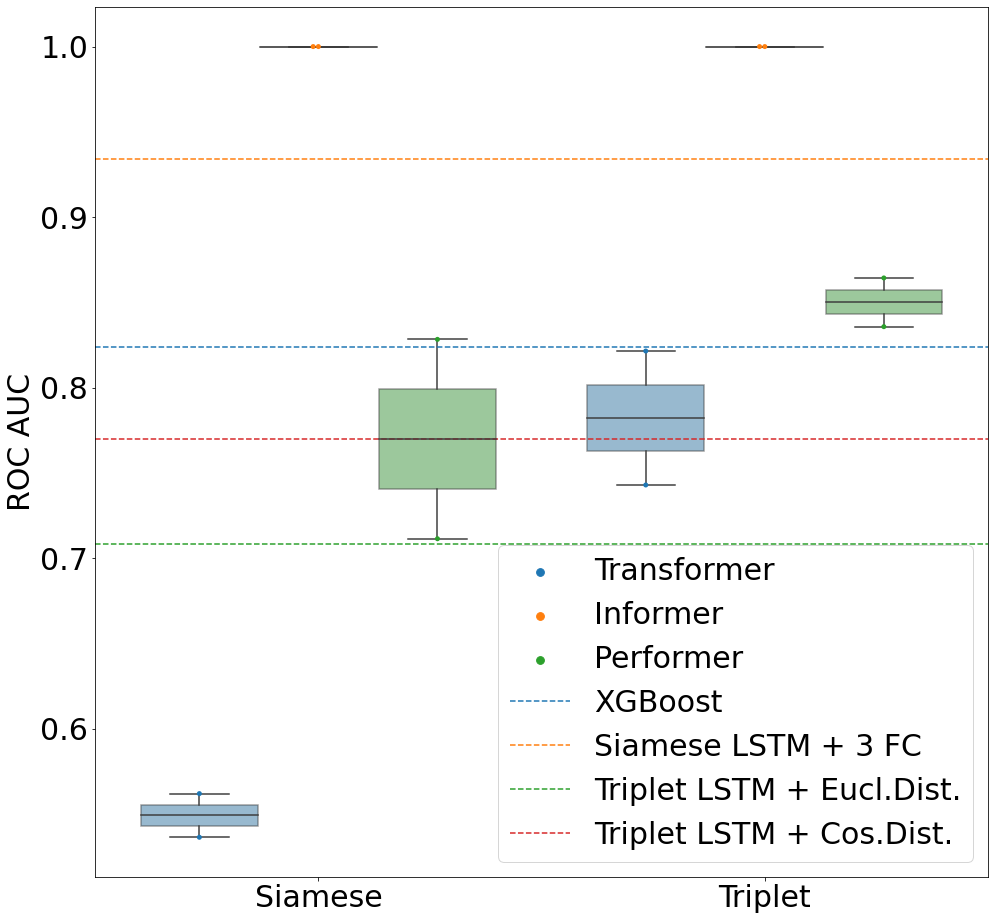

In [21]:
plt.figure(figsize=(16, 16))

swarmplot = sns.swarmplot(x="model_type", y="scores", data=df, hue="model_encoder", dodge=True) 
boxplot = sns.boxplot(x="model_type", y="scores", data=df, hue="model_encoder", ax=swarmplot, boxprops={"alpha": 0.5}, showfliers=False);

line_xgb = plt.axhline(0.824, color="tab:blue", ls='--', label="XGBoost")
line_lstm_3fc = plt.axhline(0.934, color="tab:orange", ls='--', label="Siamese LSTM + 3 FC")
line_lstm_eucl = plt.axhline(0.708, color="tab:green", ls='--', label="Triplet LSTM + Eucl.Dist.")
line_lstm_cos = plt.axhline(0.77, color="tab:red", ls='--', label="Triplet LSTM + Cos.Dist.")

plt.xlabel("")
plt.ylabel("ROC AUC")

plt.legend(
    handles=swarmplot.collections + [line_xgb, line_lstm_3fc, line_lstm_eucl, line_lstm_cos],
);